# This script imports the start and stop times for all patient data files so that you can see what breaks there are in the data
(out of date; now done with script export_EU_data_times.py)

In [11]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# Get list of header files
sub='1096'
header_dir='/Users/davidgroppe/PycharmProjects/SZR_ANT/EU_METADATA/'+sub+'_headers/'
temp_files=os.listdir(header_dir)
hdr_files=list()
for a in temp_files:
    if a.endswith('.head'):
        hdr_files.append(a)
n_hdr=len(hdr_files)
print('%d header files found' % n_hdr)

165 header files found


In [50]:
start_sec=list()
stop_sec=list()
start_str=list()
stop_str=list()
file_dur=list()
file_gaps=np.zeros(n_hdr)

#milestone=datetime(1970,1,1)
milestone=datetime(2000,1,1) # Arbirary date via which to convert times into seconds
#milestone=datetime(2009,6,21)
gap_ct=0
for hdr_fname in hdr_files:
    in_fname=os.path.join(header_dir,hdr_fname)
    hdr_df=pd.read_csv(in_fname,sep='=',header=None,names=['Type','Value'])
    start_str.append(hdr_df.iloc[0,1])
    dat_splt=start_str[-1].split(' ')
    
    temp_dt=datetime.strptime(dat_splt[0],'%Y-%m-%d')
    ttl_sec=(temp_dt-milestone).total_seconds() # # of seconds since Jan. 1 2000 since the day started
    hr_splt=dat_splt[1].split(':')
    ttl_sec+=int(hr_splt[0])*3600+int(hr_splt[1])*60+float(hr_splt[2])
    start_sec.append(ttl_sec)
    n_samp=int(hdr_df.iloc[1,1]) # of time points in the file
    Fs=int(hdr_df.iloc[2,1]) #sampling rate
    stop_sec.append(ttl_sec+n_samp/Fs) # offset of file in seconds
    file_dur.append(stop_sec[-1]-start_sec[-1]) #duration of file in seconds
    
    if len(stop_sec)>1:
        file_gaps[gap_ct]=start_sec[-1]-stop_sec[-2]
        gap_ct+=1

In [32]:
uni_gaps, uni_ct=np.unique(file_gaps,return_counts=True)
for loopy in range(len(uni_gaps)):
    print('Gap=%f, occurences=%d' % (uni_gaps[loopy],uni_ct[loopy]))

Gap=0.000000, occurences=1
Gap=1.000000, occurences=111
Gap=2.000000, occurences=43
Gap=3.000000, occurences=2
Gap=5.000000, occurences=3
Gap=23.000000, occurences=1
Gap=221.000000, occurences=1
Gap=228.000000, occurences=1
Gap=266.000000, occurences=1
Gap=296.000000, occurences=1


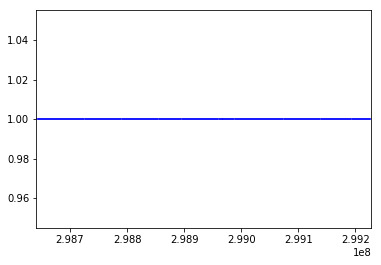

In [43]:
# Plot start and stop of each file to look for really big gaps
plt.figure(1)
plt.clf()
# plt.plot([start_sec[0], stop_sec[-1]],[0, 0],'r-')
for hdr_ct in range(n_hdr):
    plt.plot([start_sec[hdr_ct], stop_sec[hdr_ct]],[1, 1],'b-')
plt.xlim([start_sec[0], stop_sec[-1]]);

In [52]:
# Create datafram
file_times=pd.DataFrame({'HeaderFname': hdr_files,
                        'StartSec': start_sec,
                        'StopSec': stop_sec,
                        'DurationSec':file_dur,
                        'StartStr': start_str})
file_times.head()

,DurationSec,HeaderFname,StartSec,StartStr,StopSec
0,3600.0,109600102_0000.head,298641241.0,2009-06-18 11:54:01.000,298644841.0
1,3600.0,109600102_0001.head,298644842.0,2009-06-18 12:54:02.000,298648442.0
2,3600.0,109600102_0002.head,298648443.0,2009-06-18 13:54:03.000,298652043.0
3,3600.0,109600102_0003.head,298652045.0,2009-06-18 14:54:05.000,298655645.0
4,3600.0,109600102_0004.head,298655646.0,2009-06-18 15:54:06.000,298659246.0


In [53]:
# Output to csv so MATLAB can read it
out_path='/Users/davidgroppe/PycharmProjects/SZR_ANT/EU_METADATA'
out_fname=os.path.join(out_path,'data_on_off_FR_'+str(sub)+'.csv')
print('Saving file to:')
print(out_fname)
file_times.to_csv(out_fname)

Saving file to:
/Users/davidgroppe/PycharmProjects/SZR_ANT/EU_METADATA/data_on_off_FR_1096.csv
